In [2]:
#Ingresemos las librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [3]:
covid = pd.read_csv('covid.csv')

In [6]:
covid.columns

Index(['BreathingProblem', 'Fever', 'DryCough', 'Sorethroat', 'RunningNose',
       'Asthma', 'ChronicLungDisease', 'Headache', 'HeartDisease', 'Diabetes',
       'HyperTension', 'Fatigue', 'Gastrointestinal', 'Abroadtravel',
       'ContactwithCOVIDPatient', 'AttendedLargeGathering',
       'VisitedPublicExposedPlaces', 'FamilyworkinginPublicExposedPlaces',
       'WearingMasks', 'SanitizationfromMarket', 'COVID-19'],
      dtype='object')

In [5]:
#Modificar los nombres de las columnas para no tener espacios en blanco
covid.columns = covid.columns.str.replace(' ', '')

In [7]:
covid.isnull().sum()

BreathingProblem                      0
Fever                                 0
DryCough                              0
Sorethroat                            0
RunningNose                           0
Asthma                                0
ChronicLungDisease                    0
Headache                              0
HeartDisease                          0
Diabetes                              0
HyperTension                          0
Fatigue                               0
Gastrointestinal                      0
Abroadtravel                          0
ContactwithCOVIDPatient               0
AttendedLargeGathering                0
VisitedPublicExposedPlaces            0
FamilyworkinginPublicExposedPlaces    0
WearingMasks                          0
SanitizationfromMarket                0
COVID-19                              0
dtype: int64

In [14]:
covid

BreathingProblem  Fever  DryCough  Sorethroat  RunningNose  Asthma  \
0                    1      1         1           1            1       0   
1                    1      1         1           1            0       1   
2                    1      1         1           1            1       1   
3                    1      1         1           0            0       1   
4                    1      1         1           1            1       0   
...                ...    ...       ...         ...          ...     ...   
5429                 1      1         0           1            1       1   
5430                 1      1         1           0            1       1   
5431                 1      1         1           0            0       0   
5432                 1      1         1           0            1       0   
5433                 1      1         1           0            1       1   

      ChronicLungDisease  Headache  HeartDisease  Diabetes  ...  Fatigue  \
0                      0         0             0         1  ...        1   
1                      1         1             0         0  ...        1   
2                      1         1             0         1  ...        1   
3                      0         0             1         1  ...        0   
4                      1         1             1         1  ...        0   
...                  ...       ...           ...       ...  ...      ...   
5429                   1         0             0         0  ...        1   
5430                   0         1             0         1  ...        1   
5431                   0         0             1         0  ...        0   
5432                   0         1             1         0  ...        0   
5433                   0         1             0         1  ...        1   

      Gastrointestinal  Abroadtravel  ContactwithCOVIDPatient  \
0                    1             0                        1   
1                    0             0                        0   
2                    1             1                        0   
3                    0             1                        0   
4                    1             0                        1   
...                ...           ...                      ...   
5429                 1             0                        0   
5430                 0             0                        0   
5431                 0             0                        0   
5432                 0             0                        0   
5433                 0             0                        0   

      AttendedLargeGathering  VisitedPublicExposedPlaces  \
0                          0                           1   
1                          1                           1   
2                          0                           0   
3                          1                           1   
4                          0                           1   
...                      ...                         ...   
5429                       0                           0   
5430                       0                           0   
5431                       0                           0   
5432                       0                           0   
5433                       0                           0   

      FamilyworkinginPublicExposedPlaces  WearingMasks  \
0                                      1             0   
1                                      0             0   
2                                      0             0   
3                                      0             0   
4                                      0             0   
...                                  ...           ...   
5429                                   0             0   
5430                                   0             0   
5431                                   0             0   
5432                                   0             0   
5433                                   0

In [9]:
covid.dtypes

BreathingProblem                      object
Fever                                 object
DryCough                              object
Sorethroat                            object
RunningNose                           object
Asthma                                object
ChronicLungDisease                    object
Headache                              object
HeartDisease                          object
Diabetes                              object
HyperTension                          object
Fatigue                               object
Gastrointestinal                      object
Abroadtravel                          object
ContactwithCOVIDPatient               object
AttendedLargeGathering                object
VisitedPublicExposedPlaces            object
FamilyworkinginPublicExposedPlaces    object
WearingMasks                          object
SanitizationfromMarket                object
COVID-19                              object
dtype: object

In [13]:
#Quiero convertir los Yes a 1 y los No a 0
#Ademas, despues de hacer el cambio de los datos, quiero cambiar el tipo de dato a int
#generar un for que recorra todos las columnas y haga el cambio de todos los datos

for column in covid.columns:
    if covid[column].dtype == 'object':
        covid[column] = covid[column].replace({'Yes': 1, 'No': 0})
        covid[column] = covid[column].astype('int')


In [17]:
#Ya estamos con el dataset listo
#Veamos los niveles de la variable dependiente (COVID-19) CUALITATIVA
#MODELO DE CLASIFICACIÓN
covid['COVID-19'].unique()
# 1 => YES
# 0 => NO
#ESTA ES UNA DISTRIBICIÓN BINOMIAL

array([1, 0])

<Axes: xlabel='COVID-19', ylabel='count'>

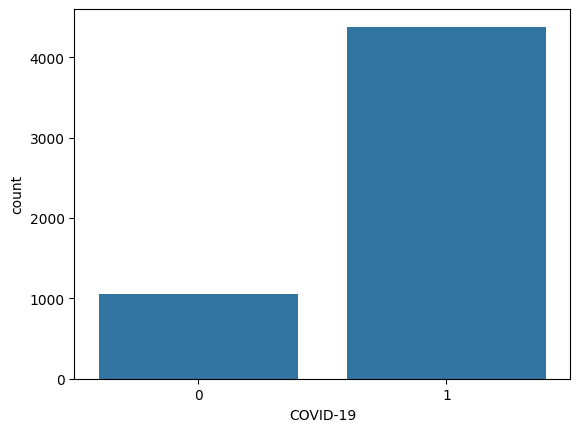

In [19]:
#Viendo la distribución de los niveles de la
#Variable dependiente de forma grafica
sns.countplot( x = "COVID-19", data = covid)


In [20]:
# Dividiendo datos para el testeo
from sklearn.model_selection import train_test_split
X = covid.drop('COVID-19', axis=1)
y = covid['COVID-19']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
#Normalizar los Datos:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
#Contruyendo el modelo de backpropagation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
#Construccion del modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1])) # Capa oculta con 64 neuronas
model.add(Dense(32, activation='relu')) # Capa oculta con 64 neuronas
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con una neurona (para clasificación binaria)

In [24]:
#Compilacion del Modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
305/305 [==============================] - 5s 6ms/step - loss: 0.1653 - accuracy: 0.9481 - val_loss: 0.0899 - val_accuracy: 0.9645
Epoch 2/100
305/305 [==============================] - 2s 7ms/step - loss: 0.0569 - accuracy: 0.9770 - val_loss: 0.0673 - val_accuracy: 0.9724
Epoch 3/100
305/305 [==============================] - 4s 12ms/step - loss: 0.0432 - accuracy: 0.9819 - val_loss: 0.0532 - val_accuracy: 0.9737
Epoch 4/100
305/305 [==============================] - 3s 11ms/step - loss: 0.0398 - accuracy: 0.9813 - val_loss: 0.0532 - val_accuracy: 0.9750
Epoch 5/100
305/305 [==============================] - 2s 6ms/step - loss: 0.0391 - accuracy: 0.9809 - val_loss: 0.0578 - val_accuracy: 0.9750
Epoch 6/100
305/305 [==============================] - 2s 7ms/step - loss: 0.0370 - accuracy: 0.9803 - val_loss: 0.0544 - val_accuracy: 0.9711
Epoch 7/100
305/305 [==============================] - 1s 3ms/step - loss: 0.0333 - accuracy: 0.9806 - val_loss: 0.0524 - val_accuracy: 0.97

In [29]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss}')
print(f'Precisión: {accuracy}')

# Hacer predicciones
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convertir probabilidades en clases


51/51 [==============================] - 0s 5ms/step - loss: 0.0464 - accuracy: 0.9822
Pérdida: 0.04644142463803291
Precisión: 0.9822195172309875
51/51 [==============================] - 0s 4ms/step


In [30]:
# Mostrar resultados
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 305   11]
 [  18 1297]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       316
           1       0.99      0.99      0.99      1315

    accuracy                           0.98      1631
   macro avg       0.97      0.98      0.97      1631
weighted avg       0.98      0.98      0.98      1631



In [31]:
# Guardar el modelo en un archivo .h5
model.save('modelo_entrenado.h5')
print('Modelo guardado como modelo_entrenado.h5')

Modelo guardado como modelo_entrenado.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
